In [460]:
# Data processing  
# -----------------------------------------------------------------------  
import pandas as pd  

# Pandas options  
# -----------------------------------------------------------------------  
pd.options.display.max_colwidth = None

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore") 

# Custom functions
# -----------------------------------------------------------------------
from src.support_eda import plot_categoric_distribution, plot_correlation_matrix, plot_numeric_distribution, plot_relation_tv_numeric, plot_outliers, quick_plot_numeric, value_counts, plot_groupby_median

In [461]:
df = pd.read_csv('../data/raw/api_rent_madrid.csv', delimiter=';')

In [462]:
df.head()

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.0,chalet,rent,371.0,False,6,3,Numancia de la Sagra,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.0,flat,rent,60.0,True,1,1,"Calle de Alejandro Villegas, 23",...,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN
2,88363329,21,750.0,flat,rent,70.0,True,2,1,Gregorio izquierdo,...,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN
3,98621753,28,400.0,penthouse,rent,67.0,True,2,2,Calle Madrid,...,False,False,90004,2,NaN,NaN,False,NaN,NaN,NaN
4,98222714,22,450.0,flat,rent,89.0,False,2,1,Calle Arroyo,...,False,False,RP1882022101719,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",NaN,NaN


In [463]:
df.duplicated().sum()

8

In [464]:
df.drop_duplicates(inplace=True)

### Main Columns

- **`propertyCode`**: Unique code identifying each property.

- **`price`**: Property price in euros (target variable).

- **`propertyType`**: Type of property (e.g., apartment, penthouse, chalet, etc.).

- **`size`**: Size of the property in square meters.

- **`rooms`**: Number of rooms.

- **`bathrooms`**: Number of bathrooms.

- **`district`**: District where the property is located (e.g., Centro, Hortaleza).

- **`neighborhood`**: Neighborhood within the district (less complete data compared to `district`).

- **`latitude`** and **`longitude`**: Geographic coordinates of the property.

- **`address`**: Approximate or descriptive address of the property.

- **`operation`**: Type of operation, such as sale or rent.

- **`province`**: Province where the property is located.

- **`municipality`**: Municipality where the property is situated.

- **`country`**: Country of the property.

### Additional Attributes

- **`numPhotos`**: Number of photos available for the property.

- **`exterior`**: Boolean indicator showing if the property is exterior-facing (`True` or `False`).

- **`hasLift`**: Indicates if the property has an elevator (`True` or `False`, with some null values).

- **`parkingSpace`**: Information about parking space (detailed in JSON format in some rows).

- **`priceByArea`**: Price per square meter in euros.

- **`floor`**: Floor where the property is located (e.g., ground floor, 1st floor, penthouse).

- **`description`**: Textual description of the property.

- **`distance`**: Distance in meters from a reference point (e.g., the center).

### Listing Features Columns

- **`hasVideo`**: Indicates if the listing includes a video (`True` or `False`).

- **`has3DTour`**: Indicates if the listing has a 3D tour available.

- **`newDevelopment`**: Boolean indicating if the property is a new development.

- **`superTopHighlight`** and **`topNewDevelopment`**: Boolean indicators of the prominence or highlight status of the listing on the platform.

### Less Complete Features

- **`neighborhood`** and **`district`**: Although important, these contain null values and may require cleaning.

- **`parkingSpace`** and **`labels`**: Information limited to a few properties.

- **`newDevelopmentFinished`**: Only available for specific properties, with low representation.

- **`showAddress`**: Indicates whether the address is visible in the listing.

- **`detailedType`**: Detailed type of the property.

- **`suggestedTexts`**: Texts suggested by the platform to enhance the listing’s presentation.

- **`has360`**: Whether the listing includes 360-degree images.

- **`hasStaging`**: Indicates if virtual staging is present in the listing.

- **`externalReference`**: External reference provided by the advertiser.



In [465]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
propertyCode,442.0,94573262.11,13974749.91,666696.0,97550391.50,98662647.0,98894324.25,98939685.0
numPhotos,442.0,21.85,9.66,0.0,15.00,21.0,28.00,72.0
price,442.0,672.96,83.96,340.0,645.00,700.0,740.00,750.0
size,442.0,67.96,35.87,20.0,46.25,62.0,80.00,371.0
rooms,442.0,1.70,0.98,0.0,1.00,2.0,2.00,6.0
bathrooms,442.0,1.21,0.44,1.0,1.00,1.0,1.00,3.0
distance,442.0,22266.39,16991.27,183.0,7089.00,20001.0,34854.75,59919.0
priceByArea,424.0,11.95,5.37,1.0,8.00,11.0,15.00,33.0


In [466]:
df['price'].isna().value_counts()

price
False    442
Name: count, dtype: int64

## Main columns

### **`propertyCode`**

Unique code identifying each property.

In [467]:
print(f"There are a total of {df['propertyCode'].unique().shape[0]} different property codes out of {df.shape[0]} entries")

There are a total of 442 different property codes out of 442 entries


In [468]:
print(f"Number of missing values: {df['propertyCode'].isna().sum()}\nNumber of different entries: {df['propertyCode'].nunique()}")

Number of missing values: 0
Number of different entries: 442


`propertyCode` is a good identifier for each home as it does not have duplicates. The removal of duplicates has worked properly.

In [469]:
df['propertyCode'].unique().shape[0]

442

### **`price`**

Property price in euros (target variable).

In [470]:
df['price'].describe().round(2)

count    442.00
mean     672.96
std       83.96
min      340.00
25%      645.00
50%      700.00
75%      740.00
max      750.00
Name: price, dtype: float64

The highest price is €750, with an average of approximately €673 and a median of €700. This means that most of the data falls within the €700–€750 range. 

The standard deviation is approximately €84, indicating some dispersion in the data, mainly due to the lower values, as the minimum goes down to €340.

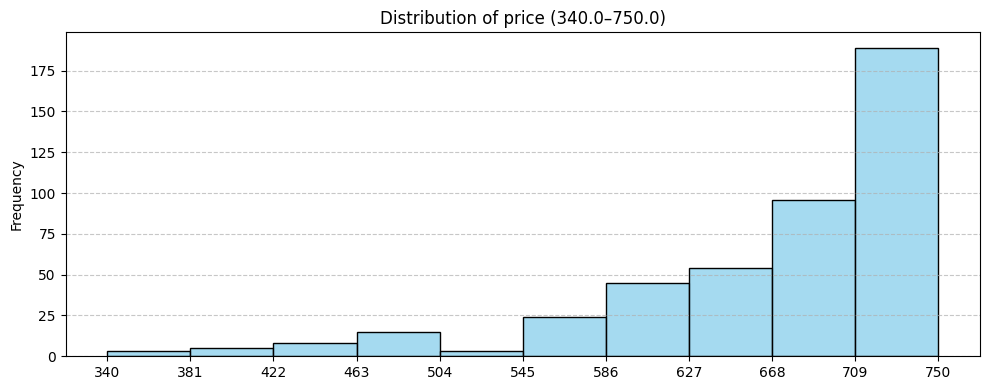

In [471]:
min_ = df['price'].min()
max_ = df['price'].max()

plot_numeric_distribution(df, min_, max_, 'price', n = 41, size=(10,4), rotation=0)

We can see, therefore, that prices are mainly clustered towards the higher values, with a relatively long tail to the left. This upper price limit suggests the application of some type of prior selection filter or, less likely, the implementation of a policy on abusive limits to curb speculative housing market practices.

### **`propertyType`**

Type of property (e.g., apartment, penthouse, chalet, etc.).

In [472]:
print(f"Number of missing values: {df['propertyType'].isna().sum()}\nNumber of different entries: {df['propertyType'].nunique()}")

Number of missing values: 0
Number of different entries: 6


In [473]:
value_counts(df, 'propertyType')

,count,proportion
propertyType,,
flat,348,0.79
studio,48,0.11
duplex,19,0.04
penthouse,16,0.04
chalet,9,0.02
countryHouse,2,0.00


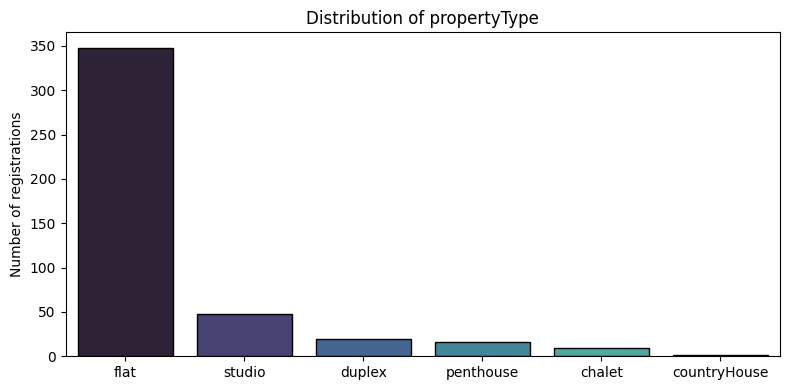

In [474]:
plot_categoric_distribution(df, 'propertyType', rotation=0)

The majority of properties are `flat`, which makes sense given that Madrid is a large city. The next category is `studio`, which refers to properties without separate rooms, consisting of a single space.

The remaining property types are very uncommon but may still be relevant for the analysis.

Are `studios` equivalent to zero rooms?  

Apparently, yes, but let's take a closer look.

In [475]:
df[(df['propertyType'] != 'studio') & (df['rooms'] == 0)]

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
241,88875520,15,750.0,penthouse,rent,80.0,True,0,1,Zona Industrial,...,False,False,3248-16907,1,Zona Industrial,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",NaN,NaN


In [476]:
df[(df['propertyType'] == 'studio') & (df['rooms'] != 0)]

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished


There isn’t any `studio` that has more than 0 rooms, which is consistent with the definition of a `studio`. However, there is one property with 0 rooms that is not a `studio` but a `penthouse`. This is possible, as a `penthouse` can have 0 rooms, but when setting the category, it was not possible to select both simultaneously.

### **`size`**

Size of the property in square meters.

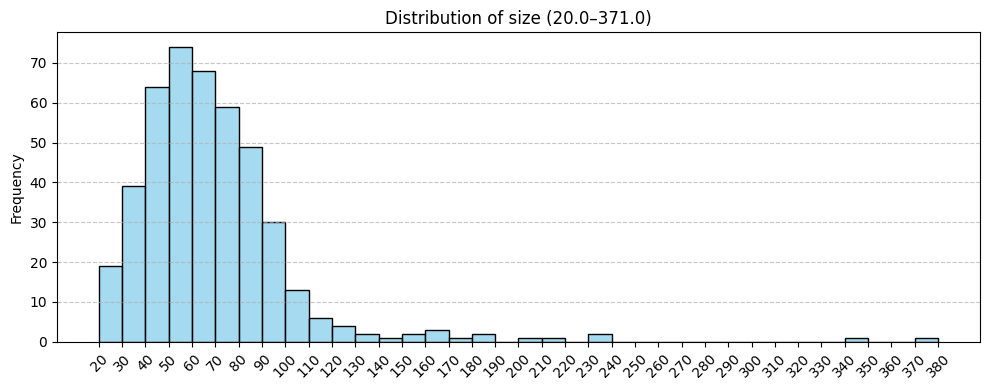

In [477]:
min_ = df['size'].min()
max_ = df['size'].max()

plot_numeric_distribution(df, min_, max_, 'size', n = 10, size=(10,4))

Most homes are relatively small, between 20 and 100 square meters, with an apparently normal distribution but a long tail to the right, likely representing more spacious houses on the outskirts of the city.

### **`rooms`**

Number of rooms.

In [478]:
print(f"Number of missing values: {df['rooms'].isna().sum()}\nNumber of different entries: {df['rooms'].nunique()}")

Number of missing values: 0
Number of different entries: 6


In [479]:
value_counts(df, 'rooms')

,count,proportion
rooms,,
2,171,0.39
1,135,0.31
3,77,0.17
0,49,0.11
4,9,0.02
6,1,0.00


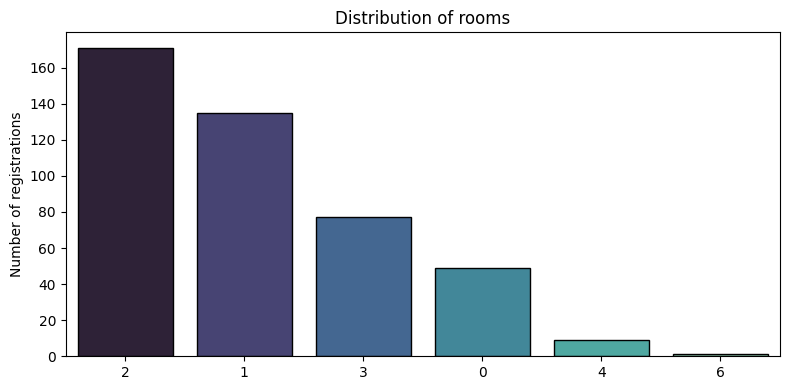

In [480]:
plot_categoric_distribution(df, 'rooms', size = (8, 4), rotation=0)

The majority of homes have between 1 and 3 rooms, which is most common for small families, couples, or single individuals. There are also some with no rooms, as mentioned earlier.

### **`bathrooms`**

Number of bathrooms.

In [481]:
print(f"Number of missing values: {df['bathrooms'].isna().sum()}\nNumber of different entries: {df['bathrooms'].nunique()}")

Number of missing values: 0
Number of different entries: 3


In [482]:
value_counts(df, 'bathrooms')

,count,proportion
bathrooms,,
1,357,0.81
2,79,0.18
3,6,0.01


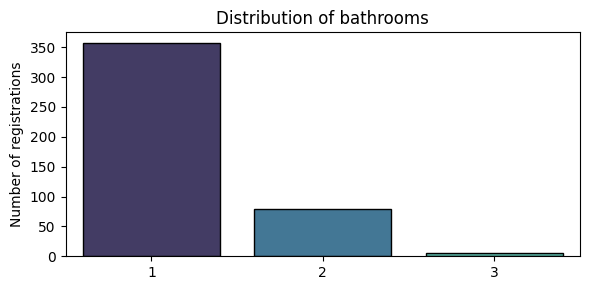

In [483]:
plot_categoric_distribution(df, 'bathrooms', size = (6, 3), rotation=0)

Over 80% of homes have a single bathroom, which reinforces the possibility of data segmentation around couples, small families, or single-person households.

### **`district`**

District where the property is located (e.g., Centro, Hortaleza).

In [484]:
print(f"Number of missing values: {df['district'].isna().sum()}\nNumber of different entries: {df['district'].nunique()}")

Number of missing values: 109
Number of different entries: 96


Since we have some missing values we can create an `unknown` category. For next steps we can geolocate the via coordinates

In [485]:
df['district'].fillna('unknown', inplace=True)

In [486]:
value_counts(df, 'district').head()

,count,proportion
district,,
unknown,109,0.25
Centro,48,0.11
Villaverde,23,0.05
Puente de Vallecas,17,0.04
El Quiñón,13,0.03


In [487]:
print(f"Number of missing values: {df['district'].isna().sum()}\nNumber of different entries: {df['district'].nunique()}")

Number of missing values: 0
Number of different entries: 97


Let's visualize only the top 25 districts

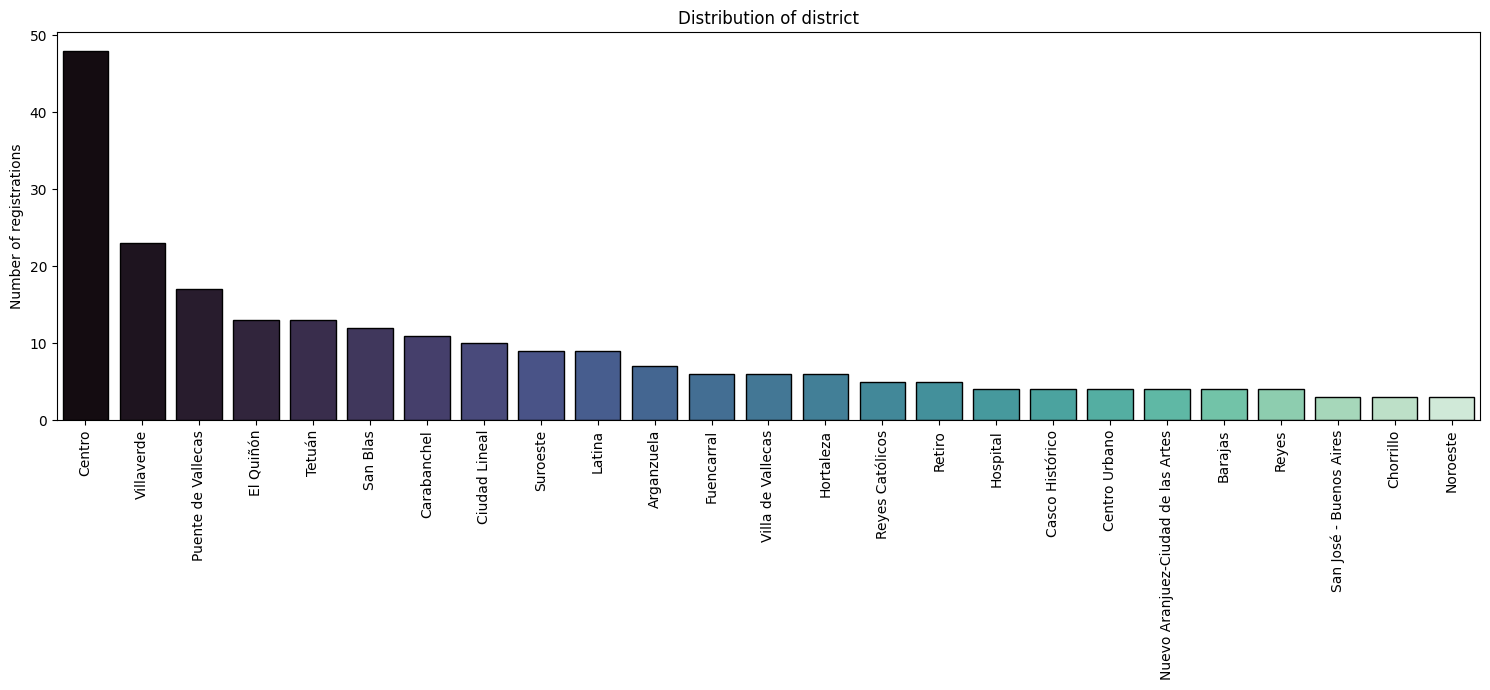

In [488]:
main_districts = df['district'].value_counts().iloc[1:26].index.to_list()
plot_categoric_distribution(df[df['district'].isin(main_districts)], 'district', size=(15, 7), rotation=90)

Setting aside `unknown`, `centro` is the most frequent district, followed by `villaverde` and `puente de vallecas`

### **`neighborhood`**

Neighborhood within the district (less complete data compared to `district`).

In [489]:
print(f"Number of missing values: {df['neighborhood'].isna().sum()}\nNumber of different entries: {df['neighborhood'].nunique()}")

Number of missing values: 268
Number of different entries: 74


In [490]:
df['neighborhood'].fillna('unknown', inplace=True)

In [491]:
value_counts(df, 'neighborhood').head()

,count,proportion
neighborhood,,
unknown,268,0.61
Lavapiés-Embajadores,11,0.02
Villaverde Alto,9,0.02
San Diego,8,0.02
Valdeacederas,8,0.02


Since we have some missing values we can create an `unknown` category. For next steps we can geolocate the via coordinates

In [492]:
print(f"Number of missing values: {df['neighborhood'].isna().sum()}\nNumber of different entries: {df['neighborhood'].nunique()}")

Number of missing values: 0
Number of different entries: 75


Let's visualize only top 25 `neighborhood`

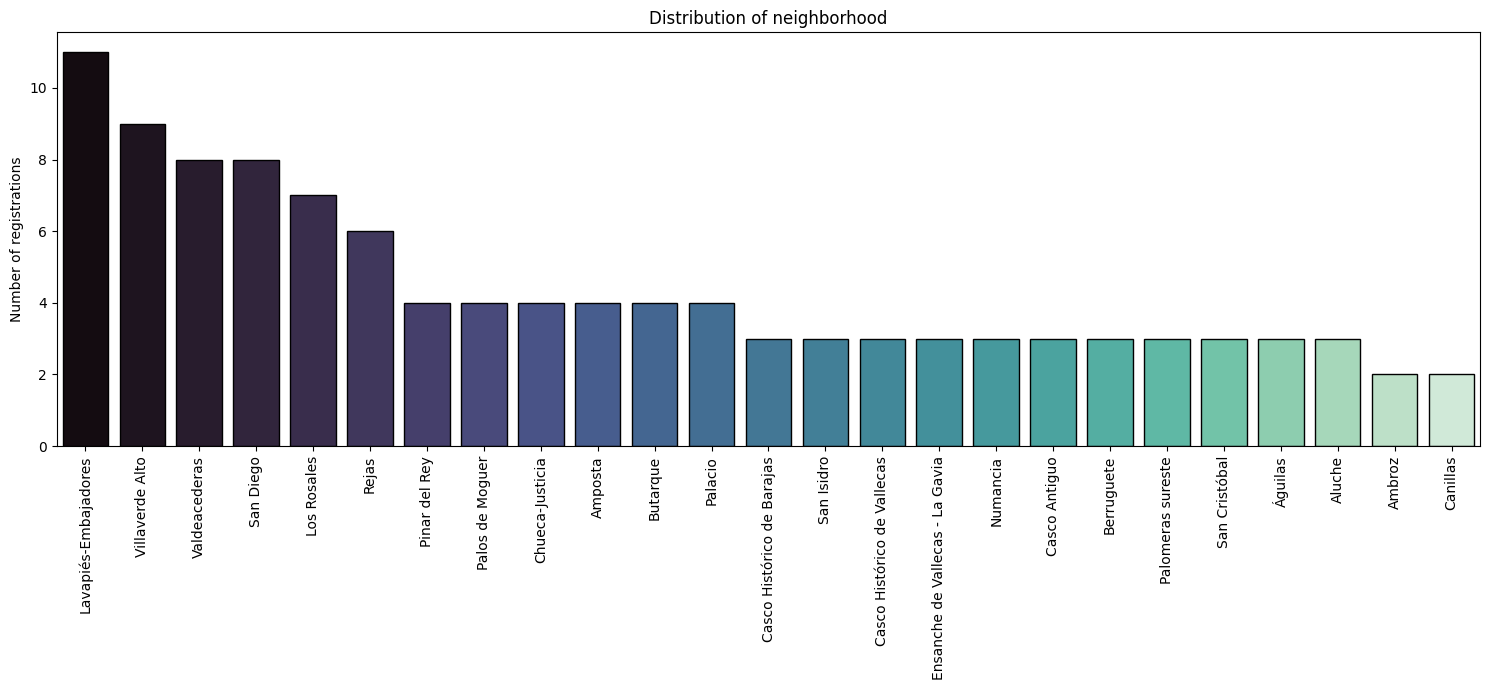

In [493]:
main_neighborhoods = df['neighborhood'].value_counts().iloc[1:26].index.to_list()
plot_categoric_distribution(df[df['neighborhood'].isin(main_neighborhoods)], 'neighborhood', size=(15, 7), rotation=90)

If we delve into the neighborhoods of each district, we find that `Lavapiés-Embajadores` has the largest number of homes, followed by neighborhoods such as `Villaverde Alto`, `Valdeacederas`, or `San Diego`.  

However, since we have quite a few unknown neighborhoods and they are a subcategory of `district`, it might be worth considering removing this column if it doesn't provide relevant information.

### **`latitude`** and **`longitude`**

Geographic coordinates of the property.

In [494]:
df[['latitude', 'longitude']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 449
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   latitude   442 non-null    object
 1   longitude  442 non-null    object
dtypes: object(2)
memory usage: 10.4+ KB


### **`address`**

Approximate or descriptive address of the property.

In [495]:
value_counts(df, 'address').head()

,count,proportion
address,,
"Calle Valle de Ambles, 2",7,0.02
El Quiñón,4,0.01
Calle de Honduras,3,0.01
Calle de Sáhara,3,0.01
Calle de Rocafort,2,0.00


We see that there is a street with a number featuring 7 homes. We suspect they might be different rental units within the same building.

In [496]:
df[df['address'] == 'Calle Valle de Ambles, 2'].head()

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
245,98068981,19,692.0,flat,rent,83.0,True,2,2,"Calle Valle de Ambles, 2",...,False,False,VT02,NaN,Suroeste,unknown,True,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",NaN,True
246,98069014,19,670.0,flat,rent,79.0,True,2,2,"Calle Valle de Ambles, 2",...,False,False,VT07,NaN,Suroeste,unknown,True,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",NaN,True
248,98069020,19,718.0,flat,rent,86.0,True,2,2,"Calle Valle de Ambles, 2",...,False,False,VT06,NaN,Suroeste,unknown,True,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",NaN,True
249,98068962,19,694.0,flat,rent,81.0,True,2,2,"Calle Valle de Ambles, 2",...,False,False,VT04,NaN,Suroeste,unknown,True,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",NaN,True
250,98069018,19,658.0,flat,rent,78.0,True,2,2,"Calle Valle de Ambles, 2",...,False,False,VT05,NaN,Suroeste,unknown,True,"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",NaN,True


It seems that this is indeed the case. In any case, this column does not provide useful information for building a predictive model, so we will likely remove it.

### **`operation`**

Type of operation, such as sale or rent.

In [497]:
df['operation'].unique()

array(['rent'], dtype=object)

In [498]:
value_counts(df, 'operation')

,count,proportion
operation,,
rent,442,1.0


Since all the properties are for rent and not in other types of operations such as sales, this column does not provide us with any information.

### **`province`**

Province where the property is located.

In [499]:
df['province'].unique()

array(['Toledo', 'Madrid', 'Guadalajara', 'Segovia', 'Ávila'],
      dtype=object)

In [500]:
value_counts(df, 'province')

,count,proportion
province,,
Madrid,353,0.80
Toledo,59,0.13
Guadalajara,21,0.05
Segovia,8,0.02
Ávila,1,0.00


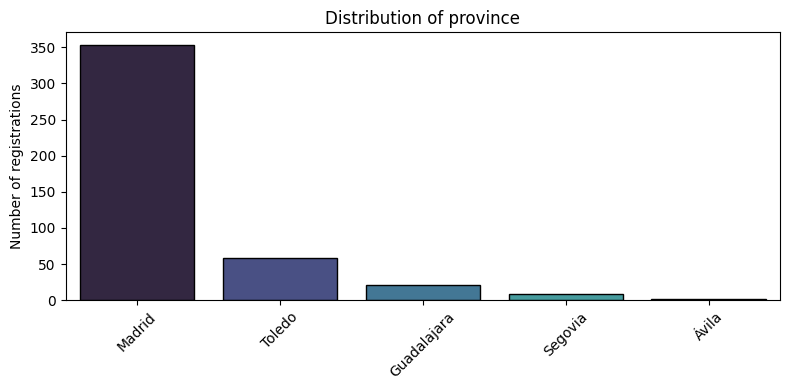

In [501]:
plot_categoric_distribution(df, 'province')

80% of the homes are located in Madrid, while the rest are distributed across adjacent provinces such as Toledo, Guadalajara, Segovia, and Ávila. Initially, we are only interested in homes in Madrid, so we could keep only those corresponding to this province.

### **`municipality`**

Municipality where the property is situated.

In [502]:
print(f"Number of missing values: {df['municipality'].isna().sum()}\nNumber of different entries: {df['municipality'].nunique()}")

Number of missing values: 0
Number of different entries: 96


In [503]:
value_counts(df, 'municipality').head()

,count,proportion
municipality,,
Madrid,170,0.38
Alcalá de Henares,22,0.05
Parla,14,0.03
Seseña,14,0.03
Aranjuez,11,0.02


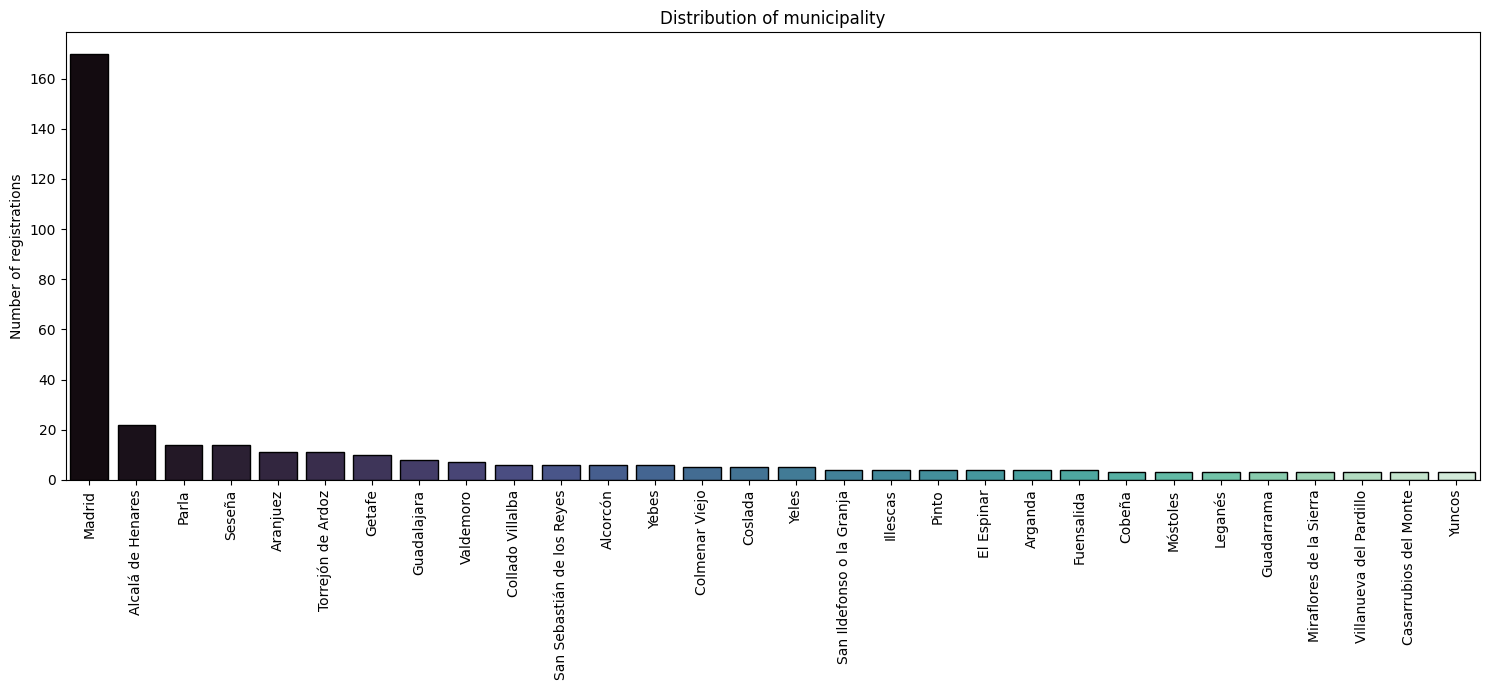

In [504]:
main_municipalities = df['municipality'].value_counts().iloc[:30].index.to_list()
plot_categoric_distribution(df[df['municipality'].isin(main_municipalities)], 'municipality', size=(15, 7), rotation=90)

Madrid accounts for 38% of the homes, followed far behind by Alcalá de Henares, which represents only 5%.

### **`country`**

Country of the property.

In [505]:
df['country'].unique()

array(['es'], dtype=object)

We only have properties from Spain, so this column does not provide any information either.

---

## Additional Attributes

### **`numPhotos`**

Number of photos available for the property.

In [506]:
print(f"Number of missing values: {df['numPhotos'].isna().sum()}\nNumber of different entries: {df['numPhotos'].nunique()}")

Number of missing values: 0
Number of different entries: 49


In [507]:
df['numPhotos'].describe().T.round(2)

count    442.00
mean      21.85
std        9.66
min        0.00
25%       15.00
50%       21.00
75%       28.00
max       72.00
Name: numPhotos, dtype: float64

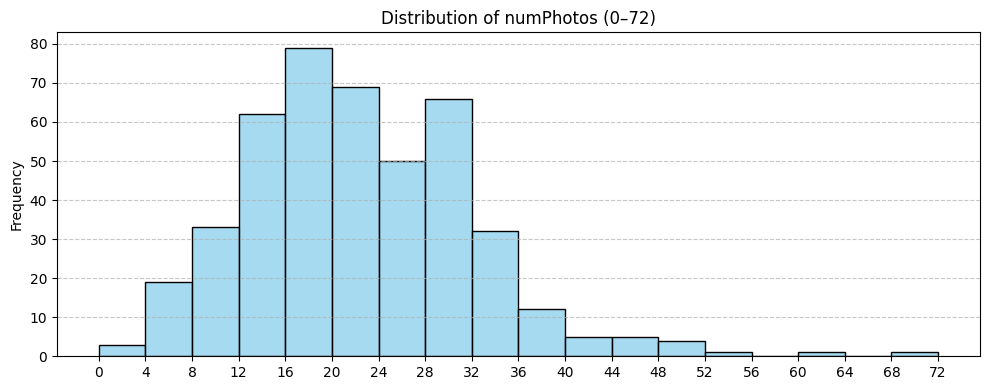

In [508]:
min_ = df['numPhotos'].min()
max_ = df['numPhotos'].max()

plot_numeric_distribution(df, min_, max_, 'numPhotos', n = 4, size=(10,4), rotation=0)

Most homes have between 4 and 40 photos, with some exceptions having a higher or lower number of images.

### **`exterior`**

Boolean indicator showing if the property is exterior-facing (`True` or `False`).

In [509]:
print(f"Number of missing values: {df['exterior'].isna().sum()}\nNumber of different entries: {df['exterior'].nunique()}")

Number of missing values: 0
Number of different entries: 2


In [510]:
value_counts(df, 'exterior')

,count,proportion
exterior,,
True,359,0.81
False,83,0.19


More than 80% of properties are exterior with the others being interior.

### **`hasLift`**

Indicates if the property has an elevator (`True` or `False`, with some null values).

In [511]:
print(f"Number of missing values: {df['hasLift'].isna().sum()}\nNumber of different entries: {df['hasLift'].nunique()}")

Number of missing values: 31
Number of different entries: 2


In [512]:
value_counts(df, 'hasLift')

,count,proportion
hasLift,,
True,226,0.55
False,185,0.45


55% of properties have lift but there are some entries with unknown values. We leave it as it is for now.

### **`parkingSpace`**

Information about parking space (detailed in JSON format in some rows).

In [513]:
value_counts(df, 'parkingSpace')

,count,proportion
parkingSpace,,
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",130,0.97
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 50.0}",1,0.01
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 40.0}",1,0.01
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 90.0}",1,0.01
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 15000.0}",1,0.01


Most listings include parking in the price, although the structure of this information is more complex, possibly the result of an API call. There don't seem to be significant differences between the listings, so for now, we will not consider this information when developing the model.

### **`priceByArea`**

Price per square meter in euros.

In [514]:
print(f"Number of missing values: {df['priceByArea'].isna().sum()}\nNumber of different entries: {df['priceByArea'].nunique()}")

Number of missing values: 18
Number of different entries: 31


We actually already have this information by dividing `price` by `size`. Let's check the differences.

In [515]:
(df['priceByArea'] - (df['price'] / df['size'])).sort_values(ascending=False, key=abs).head()

27     0.5
331    0.5
220    0.5
224    0.5
1      0.5
dtype: float64

The maximum difference is 0.5 euros per square meter, which is likely just a rounding error. Therefore, we will remove this column since it does not provide additional information and contains null values.

### **`floor`**

Floor where the property is located (e.g., ground floor, 1st floor, penthouse).

In [516]:
print(f"Number of missing values: {df['floor'].isna().sum()}\nNumber of different entries: {df['floor'].nunique()}")

Number of missing values: 81
Number of different entries: 13


In [517]:
df['floor'].fillna('unknown', inplace=True)

In [518]:
value_counts(df, 'floor').head()

,count,proportion
floor,,
1,94,0.21
unknown,81,0.18
2,75,0.17
bj,67,0.15
3,59,0.13


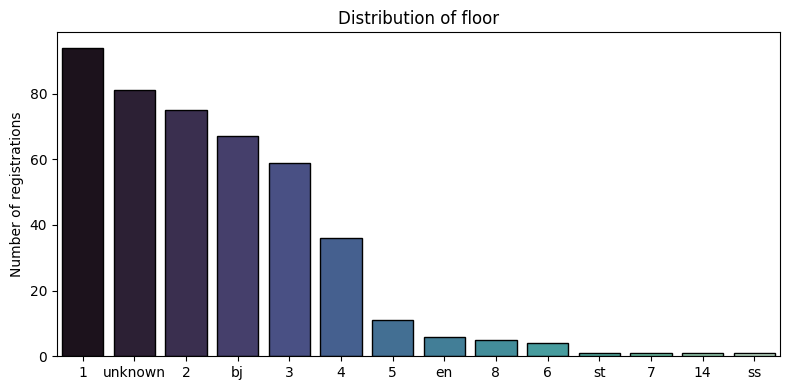

In [519]:
plot_categoric_distribution(df, 'floor', rotation=0)

The majority of homes are on the first floor, followed by ground floors and apartments up to the fifth floor. We also have quite a few entries with an unknown `floor`.

### **`description`**

Textual description of the property.

In [520]:
df['description'].head()

0    UGENA VILLAGE INMOBILIARIA GESTIONA en exclusiva el alquiler de CHALET INDIVIDUAL en urbanización Villeriche. La vivienda está dividida en apartamentos-casas que se pueden alquilar en conjunto o por separado. La primera vivienda cuenta con salón con estufa de pellets, cocina amueblada y equipada con campana extractora, horno, vitrocerámica, lavadora y nevera, 4 habitaciones (la principal con vestidor y baño con bañera y ducha de hidromasaje), 2 baños completos, y cuarto de plancha. Todas las estancias tienen aire acondicionado con bomba frio-calor. Vivienda recién reformada, muy luminosa y espaciosa.  La segunda vivienda cuenta con 2 habitaciones, salon con aire acondicionado, cocina amueblada y equipada con campana extractora, horno, vitrocerámica, lavadora, nevera y aire acondicionado y baño con bañera.  Alquiler vivienda 4 habitaciones: 800€ Alquiler vivienda 2 habitaciones: 550€ Alquiler vivienda entera: 1350€ *LA VIVIENDA TIENE CONTRATADO UN MANTENIMIENTO DE ZONAS COMUNES (PI

This information may be useful to complement some missing values or extract additional information. For now, we will not use it.

### **`distance`**

Distance in meters from a reference point (e.g., the center).

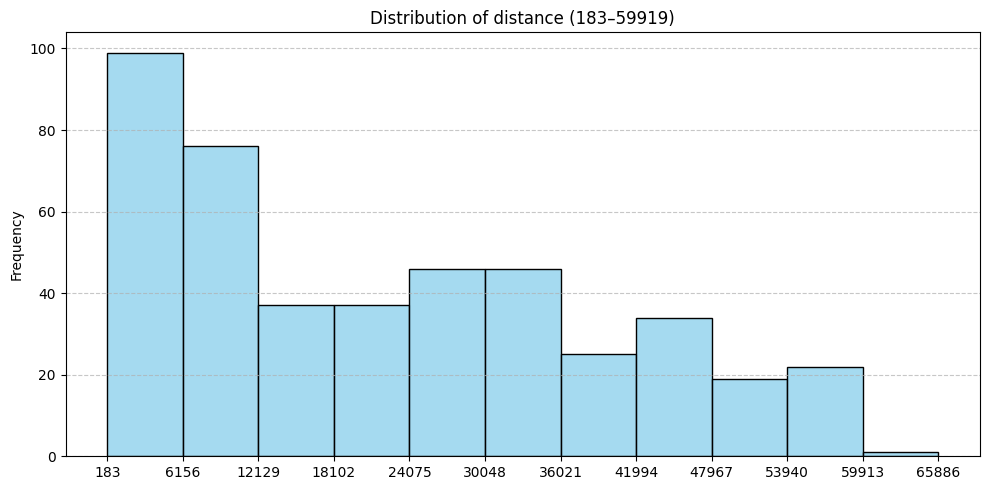

In [521]:
quick_plot_numeric(df, 'distance', rotation=0)

The largest number of homes are located less than 12 km from the center. However, the radius of the municipality of Madrid is less than 10 km. This column likely refers to the distance from a specific location common to all the homes, such as the location of the user who collected the data.

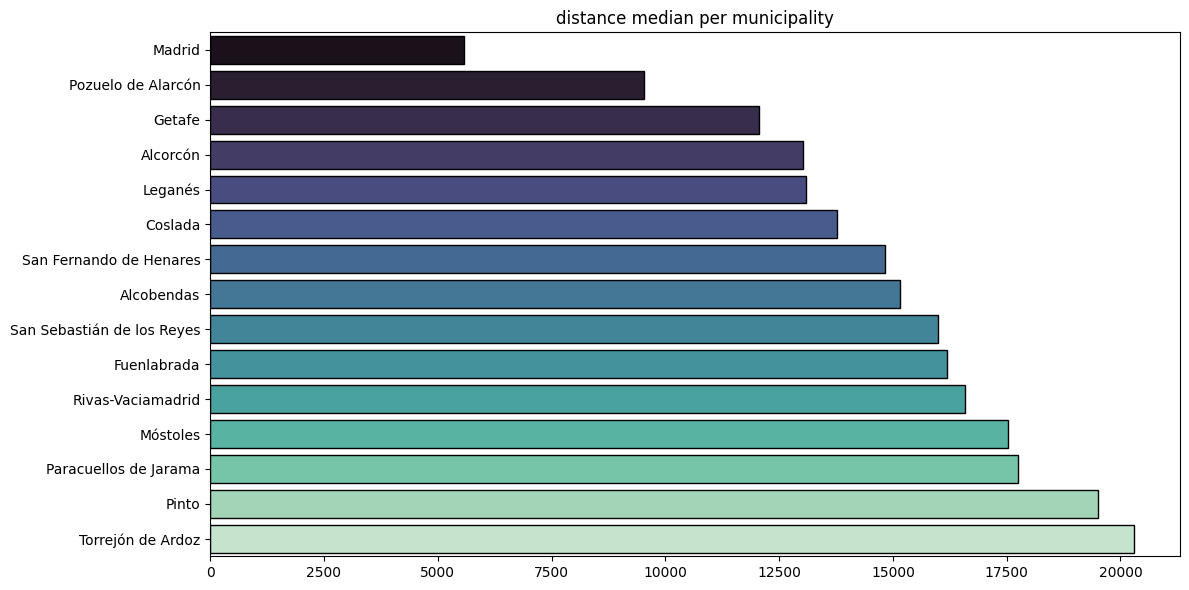

In [522]:
plot_groupby_median(df, 'municipality', 'distance', 15)

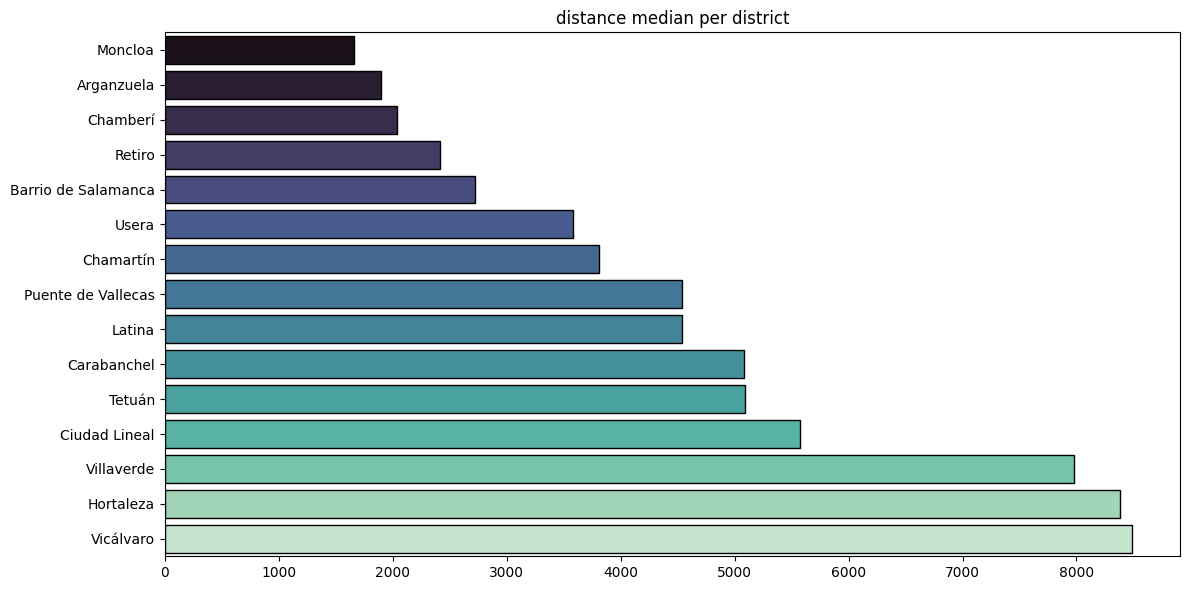

In [523]:
plot_groupby_median(df, 'district', 'distance', 15)

After calculating the median distance for each municipality and neighborhood, we can conclude that the relative distances are most likely to the center of Madrid or to a specific location around it.

---

## Other columns

### Note

We will skip these columns, as they do not provide valuable information for building a model. Alternatively, they may be considered in subsequent steps for more complex models.

---

## Column selection

After examining the key columns in the dataset, we have concluded that to develop a good model for predicting housing prices in Madrid, we should use only data from this municipality, excluding nearby municipalities whose characteristics may differ and skew the prediction.

For this reason, the `municipality` and `province` columns are no longer relevant to us.

In [524]:
df_2 = df.copy()

In [525]:
df_2 = df_2[df_2['municipality'] == 'Madrid']

We will keep the following columns:

```python
['propertyCode', 'price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms', 'distance', 'status', 'floor', 'district', 'hasLift', 'numPhotos']
```

We will drop `propertyCode` later. We keep it for now to check some properties.

In [526]:
df_2 = df_2[['propertyCode',
            'price',
            'propertyType',
            'size',
            'exterior',
            'rooms',
            'bathrooms',
            'distance',
            'status',
            'floor',
            'district',
            'hasLift',
            'numPhotos']]

## Target variable vs numeric variables

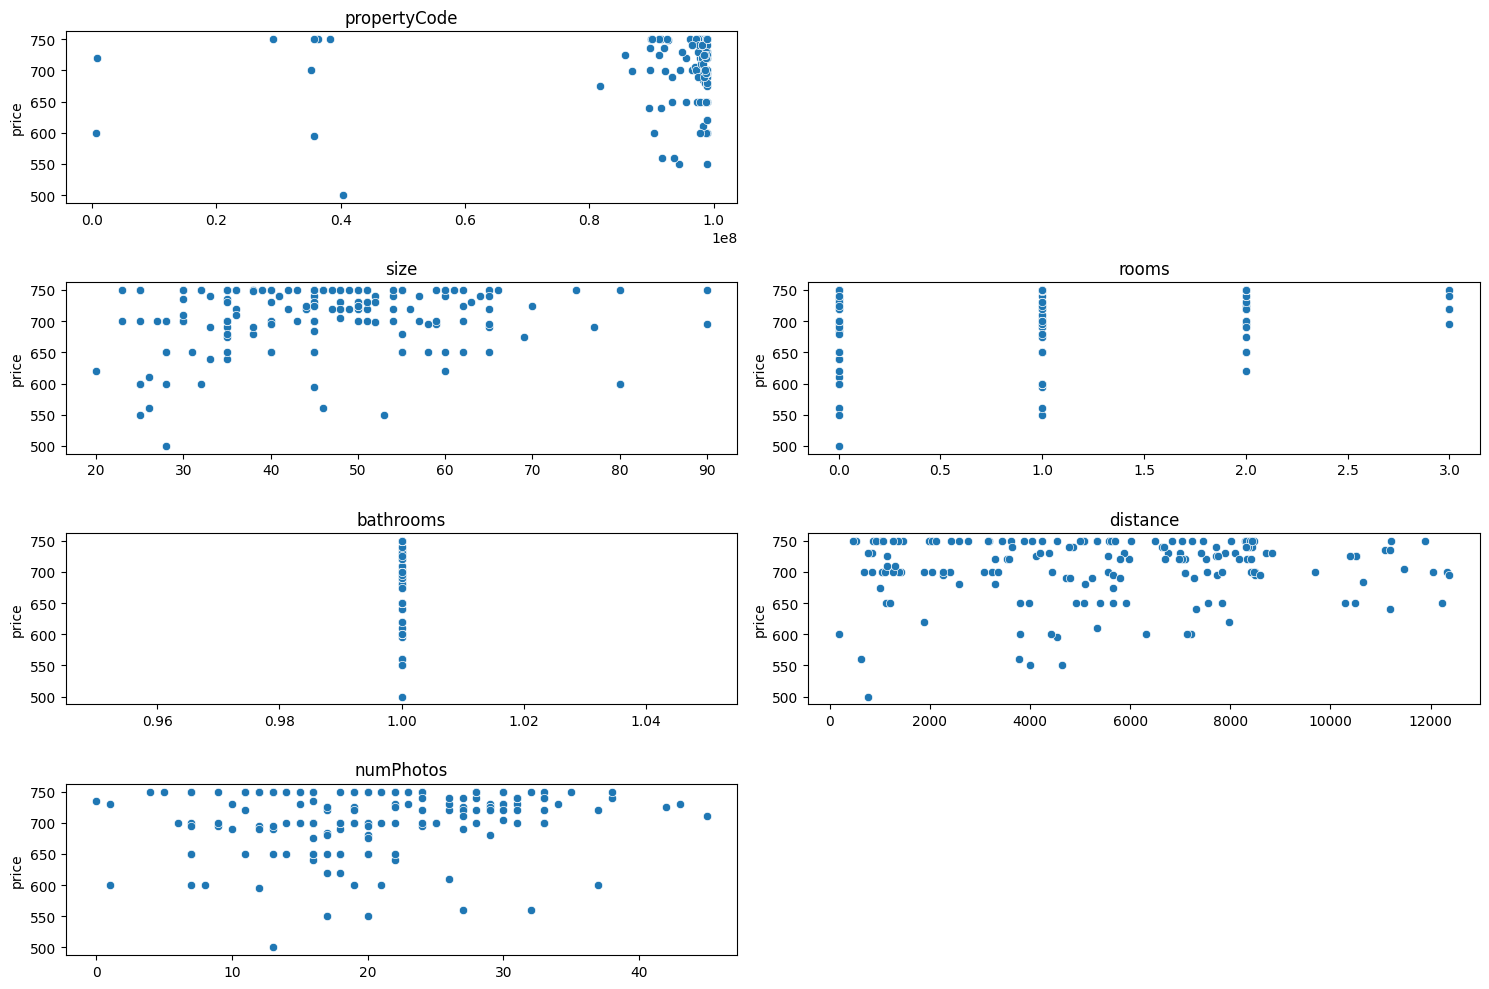

In [527]:
plot_relation_tv_numeric(df_2, 'price')

Now we see that the number of `bathrooms` is always 1. In other words, there are no homes in Madrid with more (or fewer) than one bathroom, so we can also remove this column.

We also see that the ranges for `price`, `size`, `rooms`, and `numPhotos` have narrowed after taking this subset.

In [528]:
df_2.drop(columns=['bathrooms'], inplace=True)

### Correlation matrix

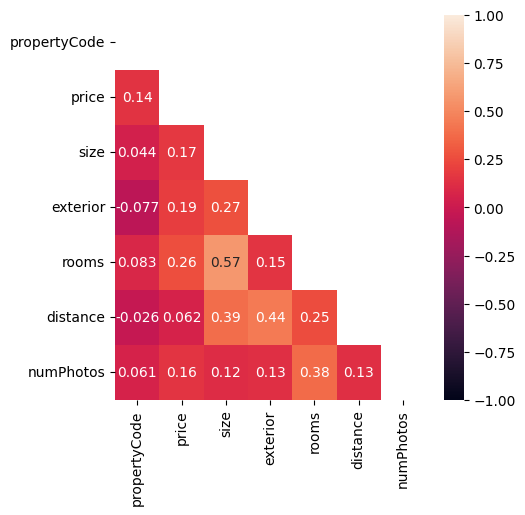

In [529]:
plot_correlation_matrix(df_2)

The correlation between variables is always positive but generally low, except for `rooms` and `size`, which is moderate. It makes sense to think that more rooms imply a larger size to accommodate them.  

There is also a moderate but weaker correlation between `distance` and `size`, suggesting that more central homes tend to be smaller.  

Interestingly, there is no correlation between `distance` and `price`. However, considering the above, if central homes are smaller but have the same price, the cost per square meter decreases with distance.  

There is also a moderate correlation between `exterior` (`bool`) and `distance`, which may indicate that interior homes are less common on the outskirts.  

Finally, there is a moderate correlation between `numPhotos` and `rooms`, which makes sense, as it is logical to include more photos for homes with a higher number of rooms.

### Outliers

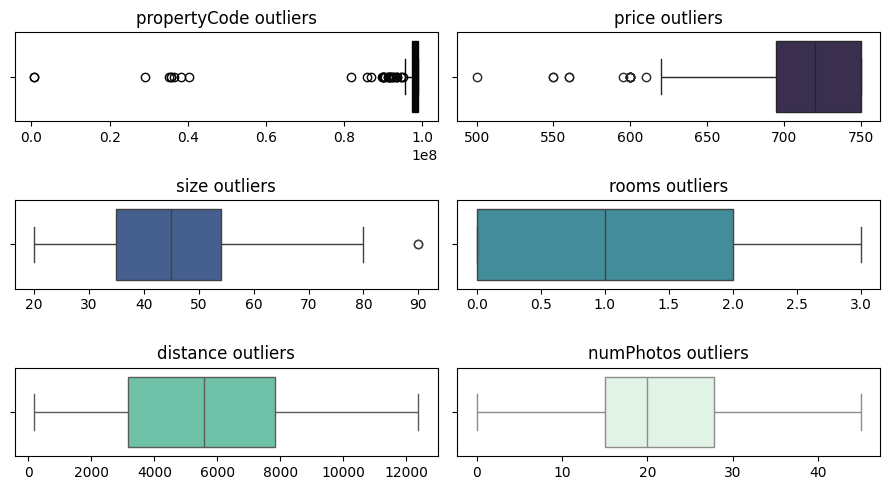

In [530]:
plot_outliers(df_2)

* For `price`, there are some outliers in the lower price range, as most values are concentrated in the upper part of the distribution.  

* For `size`, we see a few outliers in the higher values.  

Overall, there are not many outliers, and they seem reasonable.

Let’s take a closer look at the larger homes.

In [531]:
df_2[df_2['size'] > 75]

,propertyCode,price,propertyType,size,exterior,rooms,distance,status,floor,district,hasLift,numPhotos
90,98929176,695.0,flat,90.0,True,3,7729,good,unknown,Villaverde,False,24
179,98918411,600.0,duplex,80.0,False,1,7223,NaN,unknown,unknown,NaN,7
180,98919070,600.0,duplex,80.0,False,1,7141,NaN,unknown,unknown,NaN,8
333,98902228,750.0,studio,90.0,True,0,7228,good,4,San Blas,True,15
384,93305965,690.0,flat,77.0,True,2,7283,good,bj,Carabanchel,True,18
443,92564685,750.0,flat,80.0,False,2,8011,good,5,Villaverde,True,14


The property `98902228` is particularly striking as it is a `studio` with a `size` of 90, which is quite unusual. Let’s look at its original description:

In [532]:
print(df[df['propertyCode'] == 98902228]['description'].values[0])

Contacto Comercial Diego 617 27 65 51. Ofrecemos en exclusiva Loft en 4º planta con ascensor. Es ideal para aquellos que quieren un espacio amplio, con luz, excelente vista. El edificio tiene recepción, video cámara de vigilancia 24 horas, cuenta con tres ascensores, opción de aparcamiento, un amplio salón y comedor, cocina tipo americana, aire acondicionado y calefacción eléctrica Muy cerca de zonas verdes, residenciales, Zona de ocio y hoteles. Tiene una excelente comunicación al estar ubicado cerca a la calle Alcalá, a solo 7 minutos de la estación de metro de Suanzes y Torre Arias (Línea 5), parada de autobuses y excelente comunicación por carretera con acceso desde la M-30, M-40 y A-2.  Los datos expuestos son meramente orientativos y se encuentran sujetos a errores u omisiones involuntarias.


After examining the description (and translating it if necessary), it seems to make sense, so we will keep this entry.

### Missing values handling

In the exploratory analysis, we had already managed some missing values, especially in categorical variables, where we created a new `unknown` category. Let’s check if we missed any.

In [533]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 1 to 447
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   propertyCode  170 non-null    int64  
 1   price         170 non-null    float64
 2   propertyType  170 non-null    object 
 3   size          170 non-null    float64
 4   exterior      170 non-null    bool   
 5   rooms         170 non-null    int64  
 6   distance      170 non-null    int64  
 7   status        163 non-null    object 
 8   floor         170 non-null    object 
 9   district      170 non-null    object 
 10  hasLift       163 non-null    object 
 11  numPhotos     170 non-null    int64  
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 16.1+ KB


We have missing values in the `status` and `hasLift` columns. Since these are categorical variables, we could handle them as `unknown`. However, in this case, since there are only a few entries, we will perform a manual inspection to see if we can retrieve that information.

#### `status`

In [534]:
codes_status = df_2[df_2['status'].isna()]['propertyCode'].to_list()

In [535]:
df[df['propertyCode'].isin(codes_status)]['description']

7      STUDIO SIN AMUEBLAR CON GARAJE, TRASTERO Y PISCINA, ALQUILER POR AÑOS A ESTRENAR DESDE 684€ (Sin comisión de agencias) Valdebebas Living ofrece una nueva formar de vivir en Madrid para personas que eligen tener su hogar, su espacio de trabajo, su comunidad en un sólo lugar. Ubicado en Valdebebas frente a el Parque Forestal Felipe VI (el mayor parque urbano de Madrid) un entorno natural ideal para el paseo, las actividades al aire libre y el deporte, con todo tipo de servicios de restauración y ocio. Junto a la próxima estación de metro de Valdebebas, a tan solo 10 min de Plaza de Castilla.  Cada apartamento ha sido diseñado primando el confort de nuestros residentes, y se ha dotado de climatización individual con aerotérmia (calor / frio) en todas las unidades. Todas los apartamentos son exteriores con vistas al parque, jardín o a la ciudad. Amenities Piscina Gimnasio (membership) Zona ajardinada Terraza en azotea con zona de barbacoa Concierge Pre-instalación de cargadores eléc

They all appear to indicate being in good condition, so we will fill them in with that value.

In [536]:
df_2['status'] = df_2['status'].fillna('good')

In [537]:
df_2['status'].unique()

array(['good'], dtype=object)

Since there are no other `status` values, we can remove this column.

In [538]:
df_2.drop(columns=['status'], inplace=True)

#### `hasLift`

In [539]:
codes_lift = df_2[df_2['hasLift'].isna()]['propertyCode'].to_list()

In [540]:
df[df['propertyCode'].isin(codes_lift)]['description']

7      STUDIO SIN AMUEBLAR CON GARAJE, TRASTERO Y PISCINA, ALQUILER POR AÑOS A ESTRENAR DESDE 684€ (Sin comisión de agencias) Valdebebas Living ofrece una nueva formar de vivir en Madrid para personas que eligen tener su hogar, su espacio de trabajo, su comunidad en un sólo lugar. Ubicado en Valdebebas frente a el Parque Forestal Felipe VI (el mayor parque urbano de Madrid) un entorno natural ideal para el paseo, las actividades al aire libre y el deporte, con todo tipo de servicios de restauración y ocio. Junto a la próxima estación de metro de Valdebebas, a tan solo 10 min de Plaza de Castilla.  Cada apartamento ha sido diseñado primando el confort de nuestros residentes, y se ha dotado de climatización individual con aerotérmia (calor / frio) en todas las unidades. Todas los apartamentos son exteriores con vistas al parque, jardín o a la ciudad. Amenities Piscina Gimnasio (membership) Zona ajardinada Terraza en azotea con zona de barbacoa Concierge Pre-instalación de cargadores eléc

Coincidentally, these are the same properties as in the previous case. Only one of them has information about `hasLift`, which happens to be `True`. Since there are few missing values and we lack additional information, we will impute them with the mode (`True`).

In [541]:
df_2['hasLift'] = df_2['hasLift'].fillna(df_2['hasLift'].mode()[0])

In [542]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 1 to 447
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   propertyCode  170 non-null    int64  
 1   price         170 non-null    float64
 2   propertyType  170 non-null    object 
 3   size          170 non-null    float64
 4   exterior      170 non-null    bool   
 5   rooms         170 non-null    int64  
 6   distance      170 non-null    int64  
 7   floor         170 non-null    object 
 8   district      170 non-null    object 
 9   hasLift       170 non-null    bool   
 10  numPhotos     170 non-null    int64  
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 13.6+ KB


Since we don't need to check individual entries anymore, we can drop `propertyCode` and save the dataframe.

In [543]:
df_2.drop(columns=['propertyCode'], inplace=True)

In [544]:
df_2.to_csv('../data/output/api_rent_madrid_eda.csv')